<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/13th_dl_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape images for convolutional layers (add channel dimension)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Define the convolutional autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the convolutional autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/10
469/469 [==============================] - 66s 138ms/step - loss: 0.1472 - val_loss: 0.0892
Epoch 2/10
469/469 [==============================] - 62s 132ms/step - loss: 0.0855 - val_loss: 0.0814
Epoch 3/10
469/469 [==============================] - 63s 135ms/step - loss: 0.0806 - val_loss: 0.0783
Epoch 4/10
469/469 [==============================] - 61s 129ms/step - loss: 0.0781 - val_loss: 0.0764
Epoch 5/10
469/469 [==============================] - 62s 133ms/step - loss: 0.0765 - val_loss: 0.0753
Epoch 6/10
469/469 [==============================] - 62s 131ms/step - loss: 0.0754 - val_loss: 0.0743
Epoch 7/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0746 - val_loss: 0.0736
Epoch 8/10
469/469 [==============================] - 61s 129ms/step - loss: 0.0740 - val_loss: 0.0731
Epoch 9/10
469/469 [==============================] - 63s 135ms/step - loss: 0.0735 - val_loss: 0.0726
Epoch 10/10
469/469 [==============================] - 62s 132ms/step - l

313/313 [==============================] - 7s 21ms/step


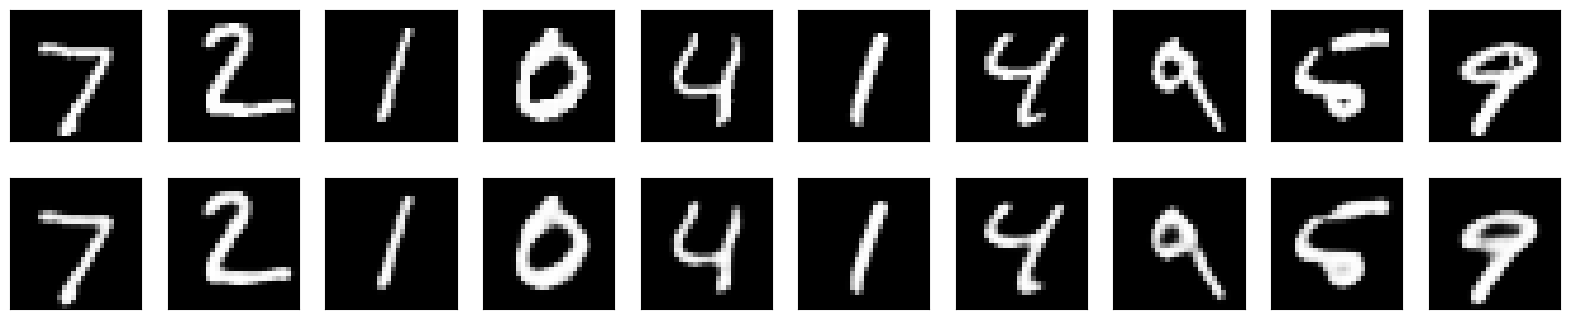

In [5]:
# Reconstruct images using the trained autoencoder
reconstructed_imgs = autoencoder.predict(x_test)

# Plot original images and reconstructed images for comparison
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
